# SimEx test notebook
Simex test notebook.

## Important settings
1. Setting the min/max domain interval and increment unit for the modifiers.
3. Setting the threshold for the validator and validator graph values.
4. Settings for the final plot with overall curves:
```python
"""Define variables for the settings of the Simex

    Attributes:
    instance_name (str): The settings instance name. No default value.
    do_plot: (bool): Enables plot in the modifier of the final modifier points. Default value is 'False'.
    extensive_search (bool): Enables complete exploration by setting modifier_data_point to 1 and enabling extensive iteration. Default value is 'False'.
    extensive_iteration (bool): Gets enabled when extensive search is True (TODO: Refactor) . Default value is 'False'.
    SimEx_mode (str): The mode of simex only exploration implemented. Default value 'exploration'.
    max_workers (int): The maximum number of parallel workers. Default value is '14'.
    domain_min_interval (int): The minimum of the input domain. Default value is '2500'
    domain_max_interval (int): The maximum of the input domain. Default value is '4000'
    modifier_incremental_unit (int): Minimal incremental unit is the smallest allowed step_size. Default value is set to '25'. Note: If extensive search True then minimal increment is set to '1'.
    modifier_data_point (int): Data point step size on the X axis in the first round. Default value is set to '100'. In next iterations modifier_data_point = modifier_data_point - modifier_incremental_unit until modifier_data_point < minimal_increment_unit.
    add_first_last_point (bool): Adding first and last point of the interval generated by the modifier. Default value is set to 'True'. Note: Smoothens the final function.
    vfs_threshold_y_fitting (int): Threshold on the y axis defining the objective function. Default value is set to '15'.
    vfs_threshold_x_interval (float): For unfit point expand by threshold_x_interval to each side to close unfit interval. Default value is set to '0.80'
    vfs_degree (int): Minimum degree for exploration. We start with polyfit in x^degree. Default value is set to '2'.
    vfs_max_deg (int): Max degree for exploration to which degree we try to fit function x^max_degree. Default value is set to '9'.
    vfs_early_stop (bool): If early_stop = True and improvement is not acceptable by increasing dimension, we stop. Default value set to 'True'.
    vfs_improvement_threshold (float): Sufficient improvement threshold (previous_mse - current_mse) >= improvement_threshold. Default value is set to '0.1'.
    vfs_penality_weight (int): Penalty for MSE to avoid overfitting with high dimension polynomial. Default value is set to '1'.
    vfs_x_labels (str): X axis label name validator graph. Default value is set to 'Traffic volume [veh/h]'.
    vfs_y_labels (str): Y axis label name validator graph. Default value is set to 'TTS [veh$\cdot$h]'.
    vfs_title (str): Title for validator graph. Default value is set to 'Fitted Curve with unfit Intervals for {self.instance_name}'.
    vfs_figsize_x (int): X size of the figure. Default value is set to '12'.
    vfs_figsize_y (int): Y size of the figure. Default value is set to '6'.
    vfs_font_size (int): Font size validator graph. Default value is set to '12'.
    ops_x_labels (str): X labels on the final graph. Default value is set to 'Traffic volume [veh/h]'.
    ops_y_labels (str): Y labels on the final graph. Default value is set to 'TTS [veh$\cdot$h]'.
    ops_title (str): Title on the final graph. Default value is set to 'Optimal Curve for {self.instance_name}'.
    ops_figsize_x (int): Figure size on the final graph. Default value is set to '10'.
    ops_figsize_y (int): Figure size on the final graph. Default value is set to '5'.
    ops_linewidth (int): Linewidth on the final graph. Default value is set to '3'.
    ops_number_x_points (int): Number of x axis points for the final graph. Default value is set to '400'.
    ops_predicted_points (bool): Display predicted points on the final graph. Default value is set to 'True'.
    ops_sigmoid_tailing (bool): Enable sigmoid tailing smoothener. Default value is set to 'True'.
    ops_sigmoid_width (int): Sigmoid width for the sigmoid smoothening. Default value is set to '15'.
    ops_threshold_plot (bool): Plot y_threshold on the final graph. Default value is set to 'True'.
    results_dir (str): Name of the results directory. Default value is set to 'results_dir_{instance_name}-{timestamp}'.
    log_filename (str): Filename for the log file. Default name is set to 'LOG-{self.instance_name}'.
    csv_filename (str): Final csv filename with the results. Default name is set to 'simex_output-{instance_name}'.
    """
```




Running simex.
Instance name Func_A
Results dir /home/amy/SimEx/notebooks/results_dir_Func_A-20250412-154848
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4000)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
Temp x: [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
[MODC]: mod_x:  [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]
[MODC]: mod_x:  {14}
MAIN mod outcome ([[2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]], [[2500, 4000]])
Simulator...
[[2600.0, 2681.53846153846

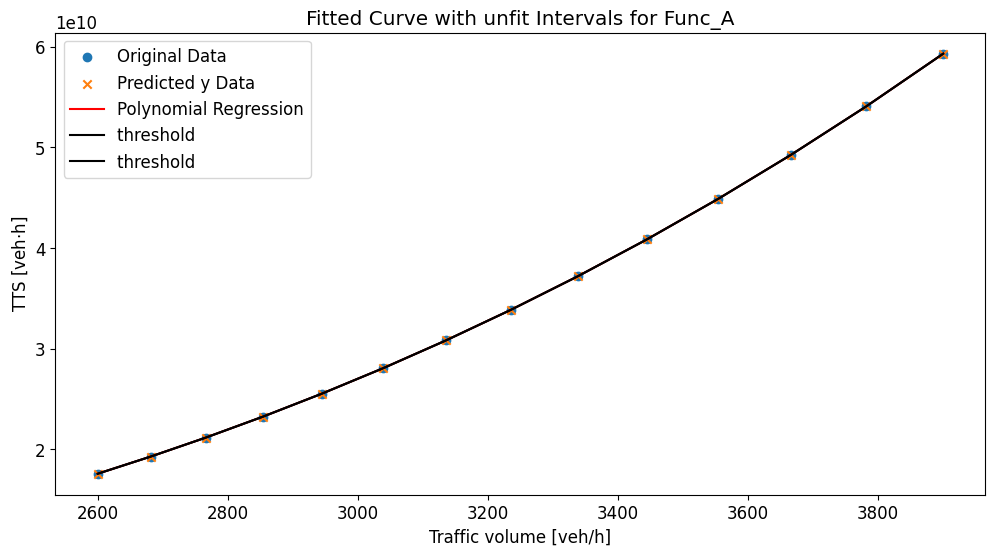

MAIN interval list from VAL: []


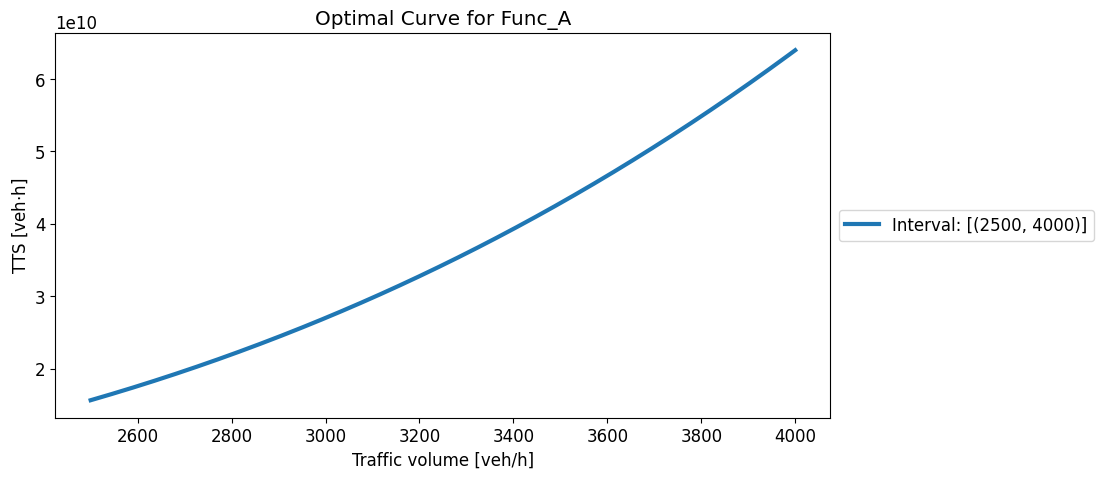

/home/amy/SimEx/notebooks/results_dir_Func_A-20250412-154848/simex_output-Func_A-20250412-154848.csv
Run finished. CSV file is /home/amy/SimEx/notebooks/results_dir_Func_A-20250412-154848/simex_output-Func_A-20250412-154848.csv
Run time: 0.027529215812683104


In [1]:
from simulator import Simulator
from validator import Validator
from modifier import Modifier
from simex import Simex
import time
before = time.time()
# Run simex
print("Running simex.")
sim = Simex(instance_name='Func_A', smoothen=False)
file = sim.run_simex(simulator_function=Simulator.sim_func_A,
                                           modifier=Modifier.modifierA,
                                           validator=Validator.local_exploration_validator_A)
print(f"Run finished. CSV file is {file}")
now = time.time()
print(f"Run time: {(now-before)/60}")